***3. Multiclass Perceptron.***

*(a) Load in the data set data0.txt. This has 2-d data in four classes (coded as 0,1,2,3). Each row
consists of three numbers: the two coordinates of the data points and the label.*

In [1]:
import numpy as np
data = np.loadtxt('data0.txt')
data
X = data[:,:-1]
Y = data[:,-1]

*(b) Run the multiclass Perceptron algorithm to learn a classifier. Create a plot that shows all the
data points (with different colors and shapes for different labels) as well as the decision regions.*

In [2]:
#Initiating the weights and biases
w1 = w2 = w3 = w4 = np.zeros(2)
b1 = b2 = b3 = b4 = 0

W = [w1,w2,w3,w4]
B = [b1,b2,b3,b4]
labels = [0,1,2,3]

In [3]:
#predicting a label with W, B for a point
def predict_label(W,B,x):
    maxj_lst = []
    for (w,b) in zip(W,B):
        #print(w)
        maxj = np.dot(w,x) + b
        maxj_lst.append(maxj)
    max_idx = maxj_lst.index(max(maxj_lst))
    return labels[max_idx]
    
    

In [4]:
#perceptron algorithm with random permutation
import random
def run_multiclass_perceptron(W,B,X,Y):
    #to count all the updates
    update_cnt = 0
    while True:
        #to count updates for that iteration
        cnt = 0
        for i in random.sample(range(len(X)),len(X)): #random permutation
            predicted_label = predict_label(W,B,X[i])
            #check mis-classification
            if predicted_label != Y[i]:
                #Get the actual label index
                y_lbl_idx = labels.index(Y[i])
                y_lbl_hat_idx = labels.index(predicted_label)
                #for correct label y
                W[y_lbl_idx] = W[y_lbl_idx] + X[i]
                B[y_lbl_idx] = B[y_lbl_idx] + 1
                #for predicted label y
                W[y_lbl_hat_idx] = W[y_lbl_hat_idx] - X[i]
                B[y_lbl_hat_idx] = B[y_lbl_hat_idx] - 1
                #print(W)
                cnt += 1
                update_cnt += 1
        if cnt == 0:
            break
    return W,B
    

In [5]:
#Finding the final W and B values
W,B = run_multiclass_perceptron(W,B,X,Y)

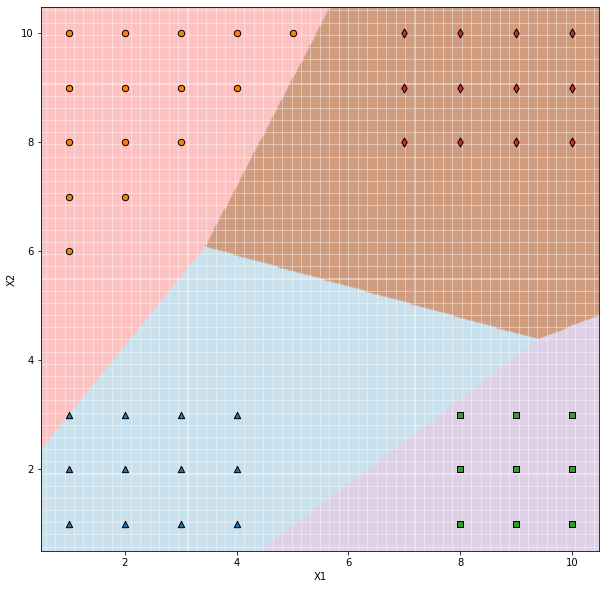

In [6]:
#Plotting the decision regions.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

plt.figure(figsize=(10, 10))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Since I have created a function which takes only one point for prediction, had to create list of prtedicted labels like this
Z = np.asarray([predict_label(W,B,i) for i in np.c_[xx.ravel(), yy.ravel()]])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='nearest', alpha=0.2)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.scatter(*X[Y==0].T, s=40, marker="^", alpha=1, edgecolors="k")
plt.scatter(*X[Y==1].T, s=40, marker="o", alpha=1, edgecolors="k")
plt.scatter(*X[Y==2].T, s=40, marker="s", alpha=1, edgecolors="k")
plt.scatter(*X[Y==3].T, s=40, marker="d", alpha=1, edgecolors="k")

plt.xlabel("X1")
plt.ylabel("X2")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()